In [15]:
# installing libraries
!pip install transformers
!pip install keras

python(50989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(50994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [27]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Load the saved model
best_svm_pipeline2 = joblib.load('best_svm_pipeline2.pkl')
lemmas_as_strings5 = joblib.load(r'/Users/usraaziz/Desktop/NLP_Submission//lemmas_as_strings5.pkl')
lemmas_as_strings6 = joblib.load(r'/Users/usraaziz/Desktop/NLP_Submission/lemmas_as_strings6.pkl')
y_train_over = joblib.load(r'/Users/usraaziz/Desktop/NLP_Submission/y_train_over.pkl')
y_test_over = joblib.load(r'/Users/usraaziz/Desktop/NLP_Submission/y_test_over.pkl')
y2_prediction_svm2 = joblib.load(r'/Users/usraaziz/Desktop/NLP_Submission/y2_predict_svm2.pkl')

In [23]:
# best_svm_pipeline2 prediction on test set
y2_pred_svm_optom2 = best_svm_pipeline2.predict(lemmas_as_strings6)
svm2_acc_optom2 = accuracy_score(y2_pred_svm_optom2, y_test_over)
print("Accuracy:", svm2_acc_optom2)

Accuracy: 0.9974764468371468


In [32]:
y2_test_over_list2 = list(y_test_over)
y2_pred_svm_list2 = list(y2_prediction_svm2)

lemmas2_test_list2 = list(lemmas_as_strings6)

# Get misclassified samples
misclassified_indices_svm2 = []
for i in range(len(y2_test_over_list2)):
    if y_test_over_list2[i] != y2_pred_svm_list2[i]:
        misclassified_indices_svm2.append(i)

# Print misclassified samples and their predicted labels
for i in misclassified_indices_svm2:
    print(f"Sample {i}: {lemmas2_test_list2[i]}")
    print(f"Predicted label: {y2_pred_svm_list2[i]}")

Sample 64: pinche calor laexcelencia cumplemarypily lapaus
Predicted label: 1
Sample 81: hes best women
Predicted label: 1
Sample 145: thats diversity dipshits
Predicted label: 1
Sample 190: thats problemhe doesnt even realize mention judge ethnicity racist
Predicted label: 1
Sample 240: easier barrack hussein obama blame gun kind radical islamic extremists hes traitor america maga
Predicted label: 1
Sample 595: true redemptionthroughcreativity
Predicted label: 1
Sample 766: tdc media amp must confuse course hate crimea radicalislamicterrorist attack usa
Predicted label: 1
Sample 963: kamakurajapanrainydaytravelseanaturewonderfulperfectworkhardtrudgerelax
Predicted label: 1
Sample 1264: horny australian women pussy
Predicted label: 1
Sample 1689: right decent concern human see things black white
Predicted label: 1
Sample 1906: selfiebeforheadingoutfelfordbestfriendeverloveher
Predicted label: 1
Sample 1955: sick sad concept majority women woman dont want president bc gender shes democr

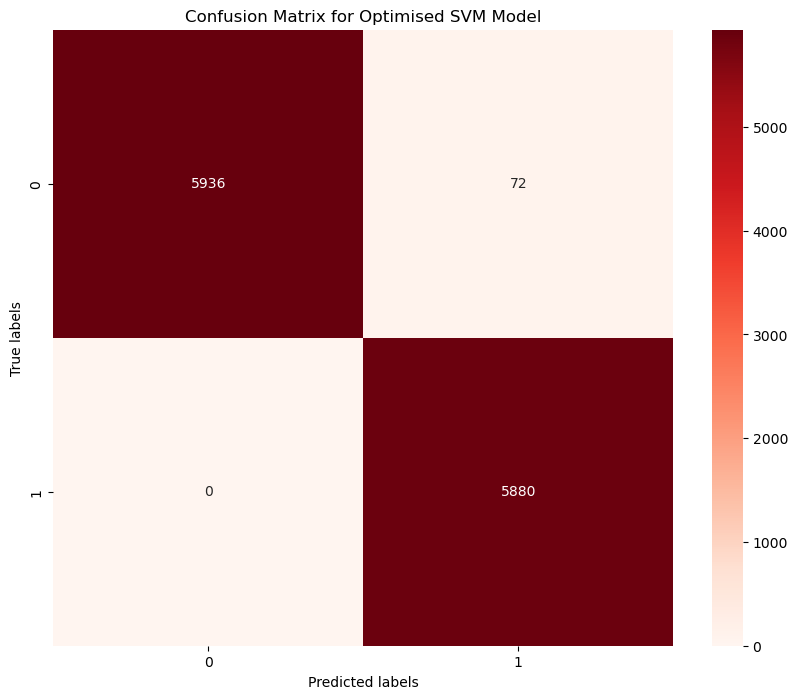

In [33]:
confus2ion_mat2_svm2 = confusion_matrix(y2_test_over_list2, y2_pred_svm_list2)

plt.figure(figsize=(10, 8))
sns.heatmap(confus2ion_mat2_svm2, annot=True, fmt="d", cmap="Reds", 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title('Confusion Matrix for Optimised SVM Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


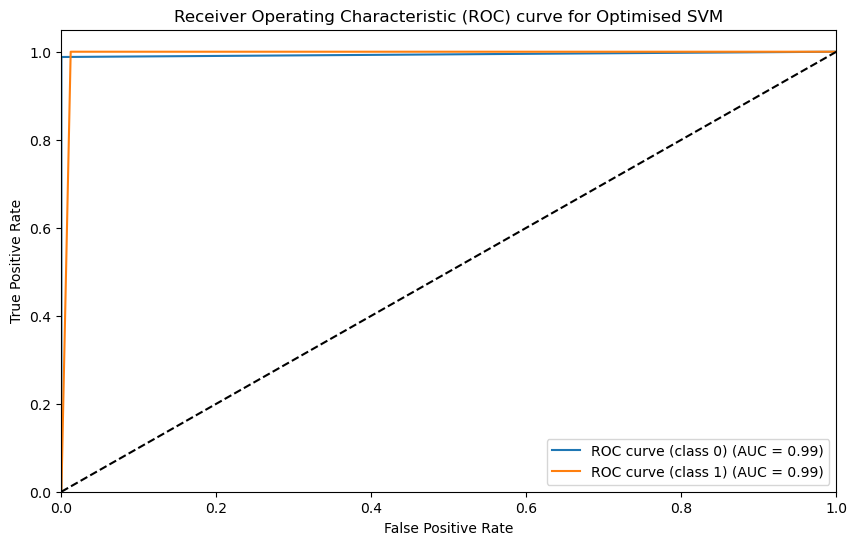

In [34]:
f2pr = dict()
t2pr = dict()
ro2c_au2c = dict()
for i in range(len(np.unique(y_test_over))):
    f2pr[i], t2pr[i], _ = roc_curve((y_test_over == i), (y2_prediction_svm2 == i))
    ro2c_au2c[i] = roc_auc_score((y_test_over == i), (y2_prediction_svm2 == i))

plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_test_over))):
    plt.plot(f2pr[i], t2pr[i], label='ROC curve (class %d) (AUC = %0.2f)' % (i, ro2c_au2c[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for Optimised SVM')
plt.legend(loc="lower right")
plt.show()
